<h1 align="center"> 
    Funções e Operadores Fuzzy
</h1>
<p> 
    Implementação em python das funções de pertinência, operadores de complemento, interseção e união de conjuntos fuzzy realizado para a disciplina de Inteligência Computacional(IC).
</p>
<h3> 
   Bibliotecas
</h3>
<p> 
    Para implementação foram utilizadas as bibliotecas <a href="https://numpy.org/"> NumPy </a> e <a href="https://docs.python.org/3/library/math.html#module-math"> math </a>. Para geração dos gráficos foi utilizada a <a href="https://matplotlib.org/"> matplotlib </a>. 
</p>

In [1]:
import numpy as np
from math import e
import matplotlib.pyplot as plt

<hr>
<h3> 
   Funções de Pertinência
</h3>

<h4>
    Triangular
</h4>    


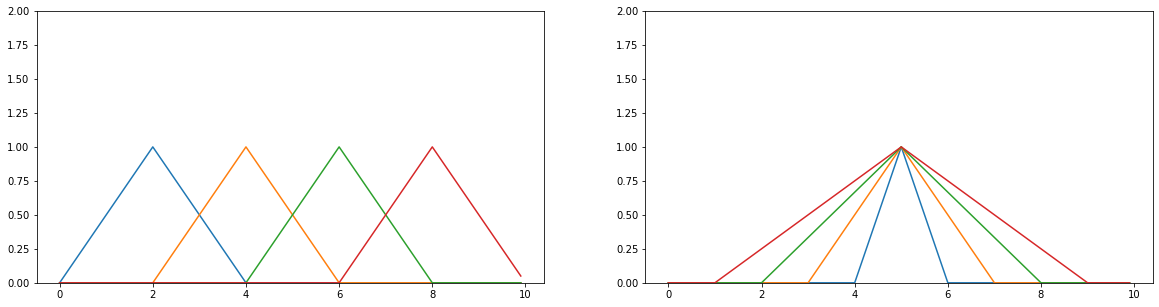

In [19]:
def triangular(i, a, m, b):
    y = list()
    for x in i:
        y.append(max(min((x - a)/(m - a), (b - x)/(b - m)), 0))
    return y

x = np.arange(0, 10, 0.1) #Declaração do eixo X

#plotagem do gráfico
plt.figure(figsize = ((20, 5)))
plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 0, 2, 4))
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 4, 6, 8))
plt.plot(x, triangular(x, 6, 8, 10))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 4, 5, 6))
plt.plot(x, triangular(x, 3, 5, 7))
plt.plot(x, triangular(x, 2, 5, 8))
plt.plot(x, triangular(x, 1, 5, 9))

<h4> 
    Trapezoidal
</h4>

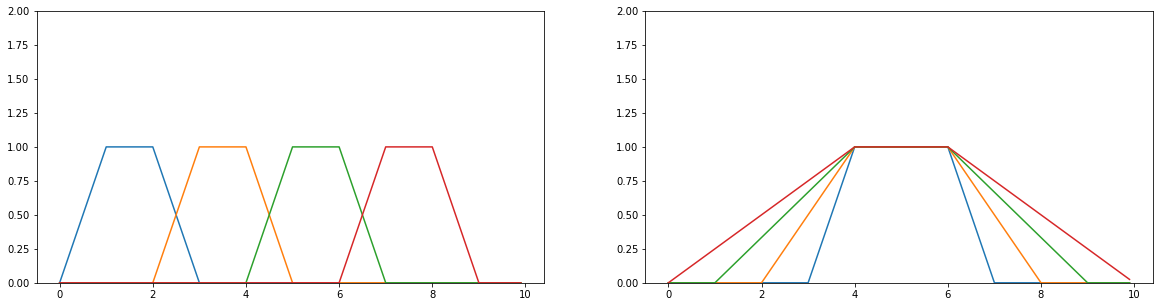

In [3]:
def trapezoidal(i, a, m, n, b):
    y = list()
    for x in i:
        y.append(max(min((x - a)/(m - a), 1,(b - x)/(b - n)), 0))
    return y

#plotagem do gráfico
plt.figure(figsize = ((20, 5)))
plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, trapezoidal(x, 0, 1, 2, 3))
plt.plot(x, trapezoidal(x, 2, 3, 4, 5))
plt.plot(x, trapezoidal(x, 4, 5, 6, 7))
plt.plot(x, trapezoidal(x, 6, 7, 8, 9))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, trapezoidal(x, 3, 4, 6, 7))
plt.plot(x, trapezoidal(x, 2, 4, 6, 8))
plt.plot(x, trapezoidal(x, 1, 4, 6, 9))
plt.plot(x, trapezoidal(x, 0, 4, 6, 10))


<h4> 
    Gaussiana
</h4>

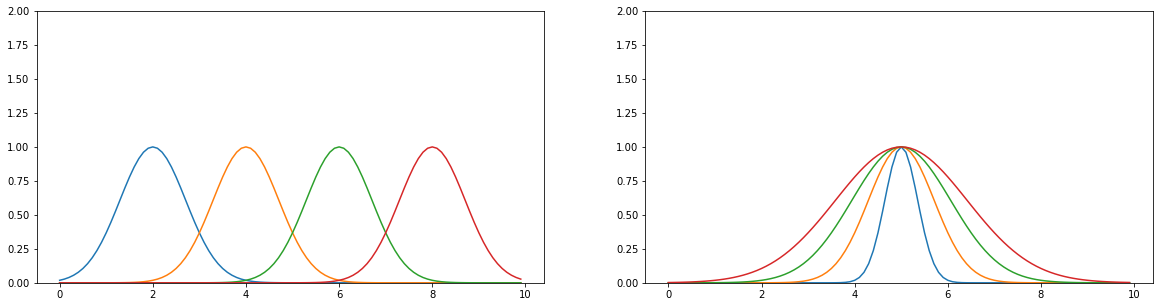

In [4]:
def gaussiana(i, k ,m):
    y = list()
    k = k/2
    for x in i:
        y.append(e**((-(x - m)**2)/(k**2)))
    return y

#plotagem do gráfico
plt.figure(figsize = ((20, 5)))
plt.subplot(1, 2, 1)       
plt.ylim(0, 2)
plt.plot(x, gaussiana(x, 2, 2))
plt.plot(x, gaussiana(x, 2, 4))
plt.plot(x, gaussiana(x, 2, 6))
plt.plot(x, gaussiana(x, 2, 8))
                
plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, gaussiana(x, 1, 5))
plt.plot(x, gaussiana(x, 2, 5))
plt.plot(x, gaussiana(x, 3, 5))
plt.plot(x, gaussiana(x, 4, 5))

<hr>
<h3> 
   Operadores de Complemento
</h3>
<h4> 
    Zadeh
</h4>

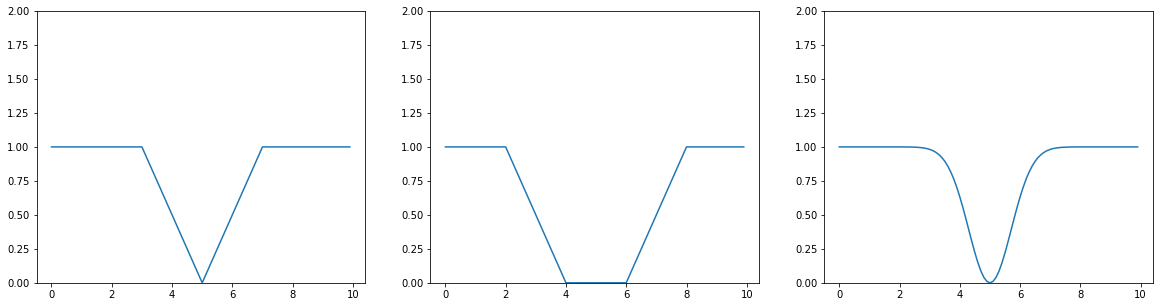

In [5]:
def zadeh(a):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append(1 - a[i])
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 3, 1)
plt.ylim(0, 2)
plt.plot(x, zadeh(triangular(x, 3, 5, 7)))

plt.subplot(1, 3, 2)
plt.ylim(0, 2)
plt.plot(x, zadeh(trapezoidal(x, 2, 4, 6, 8)))

plt.subplot(1, 3, 3)
plt.ylim(0, 2)
plt.plot(x, zadeh(gaussiana(x, 2, 5)))

<h4> 
    Sugeno
</h4>

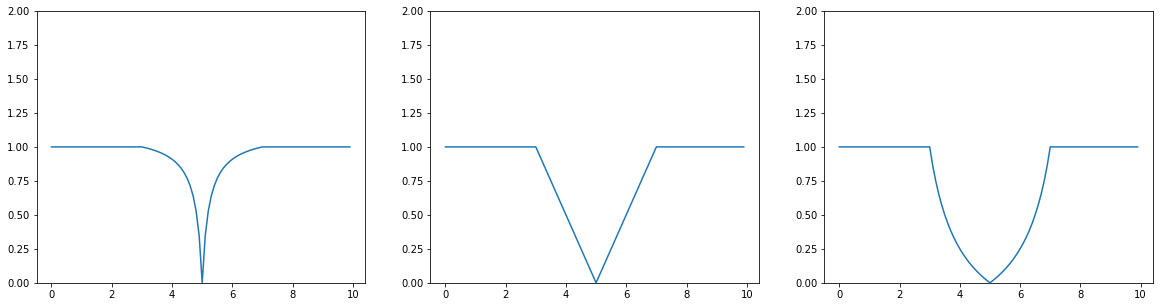

In [6]:
def sugeno(a, s):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append((1 - a[i])/(1 + s*a[i]))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 3, 1)
plt.ylim(0, 2)
plt.plot(x, sugeno(triangular(x, 3, 5, 7), -0.9)) # -1 < s < 0

plt.subplot(1, 3, 2)
plt.ylim(0, 2)
plt.plot(x, sugeno(triangular(x, 3 , 5, 7), 0))   # s = 0

plt.subplot(1, 3, 3)
plt.ylim(0, 2)
plt.plot(x, sugeno(triangular(x, 3, 5, 7), 2))    # s > 0

<h4> 
    Yager
</h4>

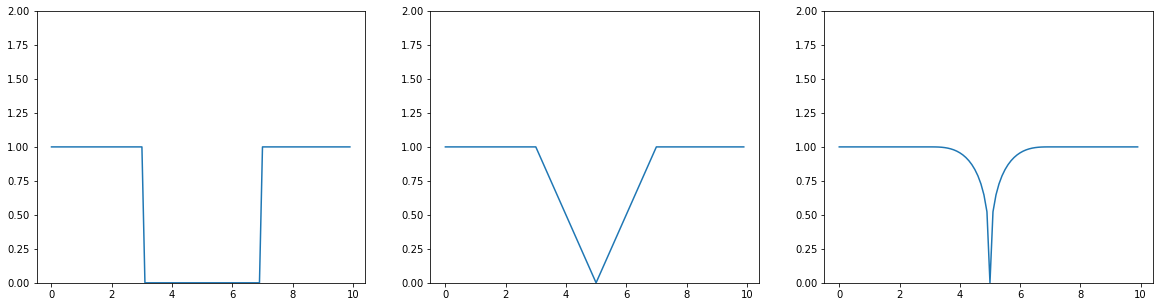

In [7]:
def yager(a, w):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append((1 - a[i]**w)**(1/w))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 3, 1)
plt.ylim(0, 2)
plt.plot(x, yager(triangular(x, 3, 5, 7), 0.001)) # w = 0.001
 
plt.subplot(1, 3, 2)
plt.ylim(0, 2)
plt.plot(x, yager(triangular(x, 3, 5, 7), 1))     # w = 1

plt.subplot(1, 3, 3)
plt.ylim(0, 2)
plt.plot(x, yager(triangular(x, 3, 5, 7), 3))     # w = 3 

<hr>
<h3> 
   Operadores de União
</h3>
<h4> 
    Máximo
</h4>

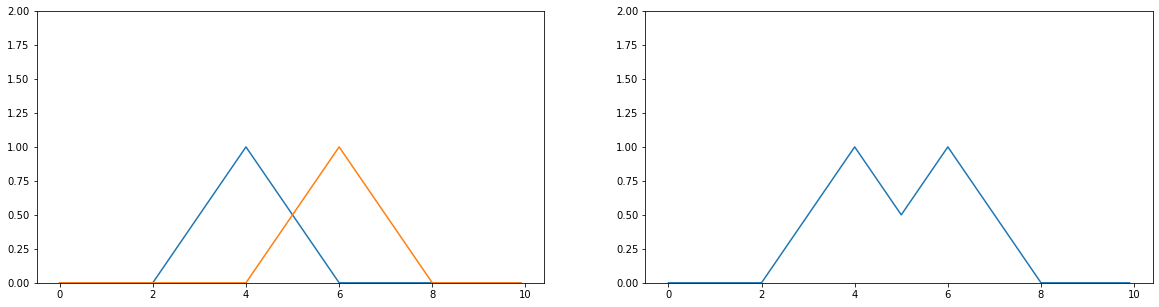

In [8]:
def maximo(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append(max(a[i], b[i]))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 4, 6, 8))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, maximo(triangular(x, 2, 4, 6), triangular(x, 4, 6, 8)))

<h4>
    Soma Probabilística
</h4>

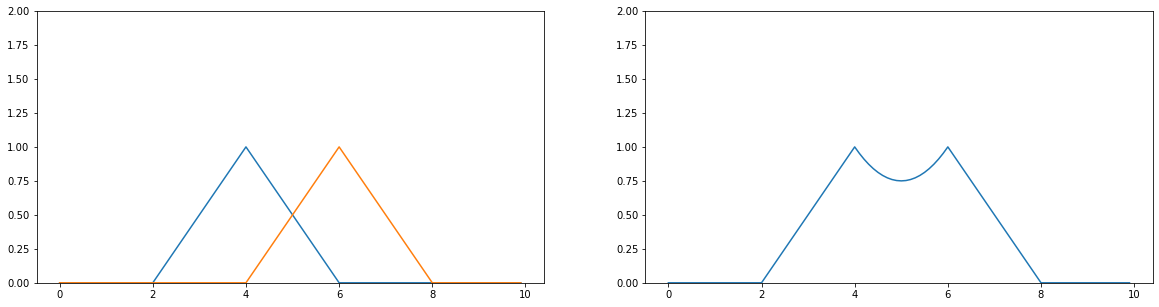

In [9]:
def somaProbabilistica(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append((a[i] + b[i]) - (a[i]*b[i]))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 4, 6, 8))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, somaProbabilistica(triangular(x, 2, 4, 6), triangular(x, 4, 6, 8)))

<h4>
    Soma Limitada
</h4>

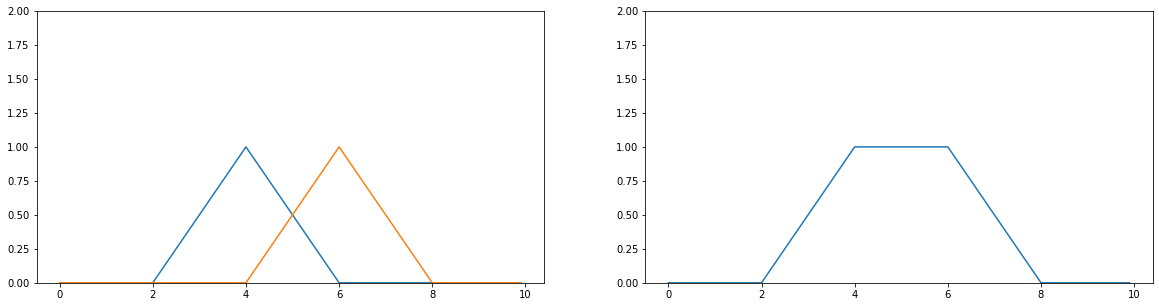

In [10]:
def somaLimitada(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append(min(a[i]+b[i],1))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 4, 6, 8))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, somaLimitada(triangular(x, 2, 4, 6), triangular(x, 4, 6, 8)))

<h4> 
    Soma Drástica
</h4>

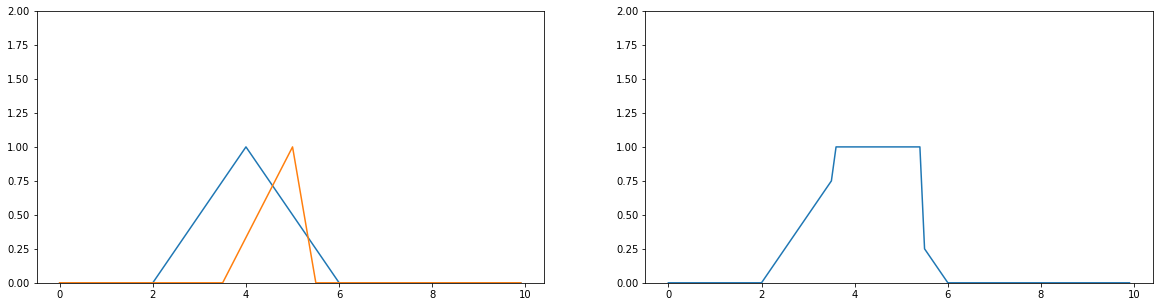

In [11]:
def somaDrastica(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        if b[i] == 0:
            y.append(a[i])
        elif a[i] == 0:
            y.append(b[i])
        else:
            y.append(1)
    return y

plt.figure(figsize = ((20, 5)))
plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 3.5, 5, 5.5))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, somaDrastica(triangular(x, 2, 4, 6), triangular(x, 3.5, 5, 5.5)))

<hr>
<h3> 
    Operadores de Interseção
</h3>
<h4>
    Mínimo
</h4>


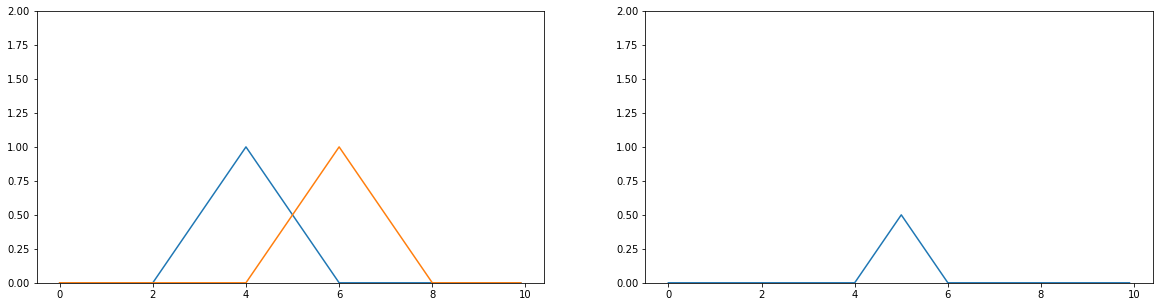

In [12]:
def minimo(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append(min(a[i], b[i]))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 4, 6, 8))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, minimo(triangular(x, 2, 4, 6), triangular(x, 4, 6, 8)))

<h4>
    Produto
</h4>


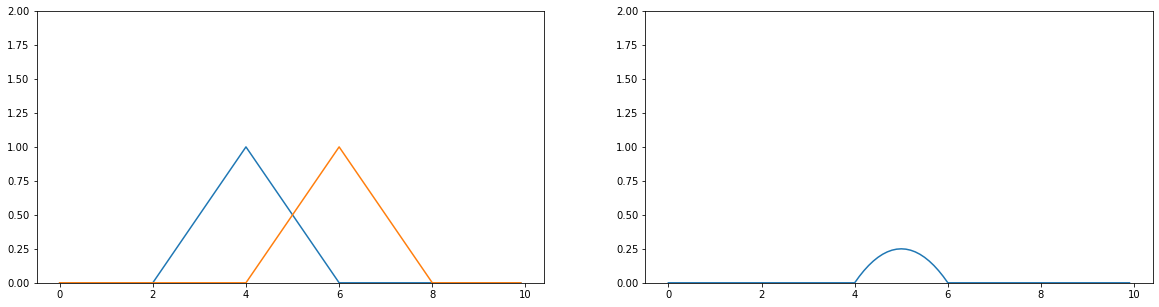

In [13]:
def produto(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append(a[i]*b[i])
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 4, 6, 8))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, produto(triangular(x, 2, 4, 6), triangular(x, 4, 6, 8)))

<h4>
   Produto Limitado
</h4>

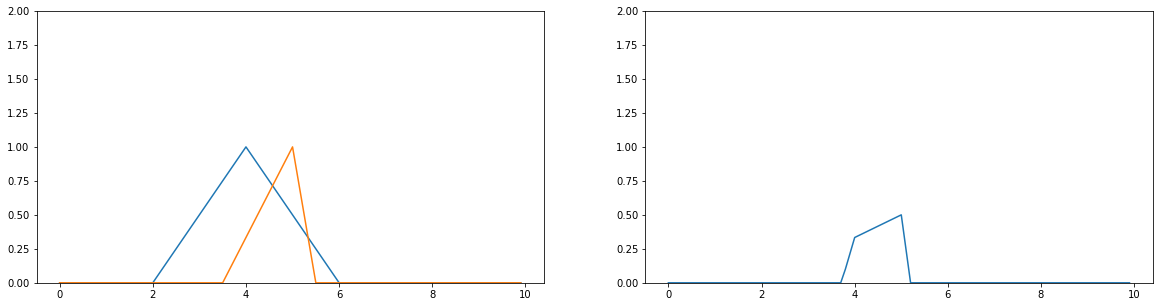

In [14]:
def produtoLimitado(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        y.append(max(0, (a[i]+b[i])-1))
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 2, 4, 6))
plt.plot(x, triangular(x, 3.5, 5, 5.5))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, produtoLimitado(triangular(x, 2, 4, 6), triangular(x, 3.5, 5, 5.5)))

<h4>
   Produto Drástico
</h4>


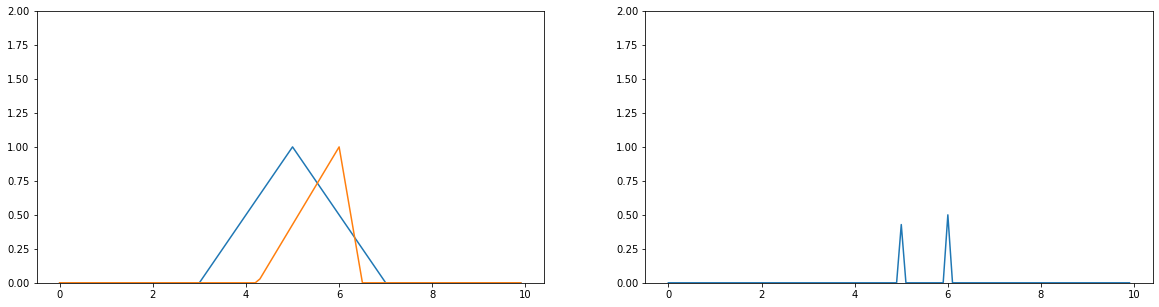

In [17]:
def produtoDrastico(a, b):
    y = list()
    for i in np.arange(0, len(a), 1):
        if a[i] == 1:
            y.append(b[i])
        elif b[i] == 1:
            y.append(a[i])
        else:
            y.append(0)
    return y

plt.figure(figsize = ((20, 5)))

plt.subplot(1, 2, 1)
plt.ylim(0, 2)
plt.plot(x, triangular(x, 3, 5, 7))
plt.plot(x, triangular(x, 4.25, 6, 6.5))

plt.subplot(1, 2, 2)
plt.ylim(0, 2)
plt.plot(x, produtoDrastico(triangular(x, 3, 5, 7), triangular(x, 4.25, 6, 6.5)))